In [8]:
def example_downforce_curve(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    a = (coef_high_speed * 0.09)
    b = (coef_medium_speed * 2.5)
    c = (coef_low_speed * 5)
    return max(0, a * speed * speed + b * speed + c)

def example_drag_curve(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    a = (coef_high_speed * 0.09)
    b = (coef_medium_speed * 2.5)
    c = (coef_low_speed * 5)
    return max(0, a * speed * speed + b * speed + c)

In [9]:
def mainplane_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.6

def mainplane_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.6

def flaps_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.3

def flaps_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.3

def endplates_downforce(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_downforce_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.1

def endplates_drag(speed, coef_low_speed=1, coef_medium_speed=1, coef_high_speed=1):
    return example_drag_curve(speed, coef_low_speed, coef_medium_speed, coef_high_speed) * 0.1

In [10]:
from sim_core.aerodynamics import AerodynamicProfile

mainplane_downforce_profile = AerodynamicProfile(mainplane_downforce)
mainplane_drag_profile = AerodynamicProfile(mainplane_drag)
flaps_downforce_profile = AerodynamicProfile(flaps_downforce)
flaps_drag_profile = AerodynamicProfile(flaps_drag)
endplates_downforce_profile = AerodynamicProfile(endplates_downforce)
endplates_drag_profile = AerodynamicProfile(endplates_drag)

# Creating an example front wing

In [11]:
from sim_core.aerodynamics import FrontWing

front_wing = FrontWing(
    mainplane=FrontWing.MainPlane(
        downforce=mainplane_downforce_profile,
        drag=mainplane_drag_profile,
        base_weight=5 # kg,
    ),
    flaps=FrontWing.Flaps(
        downforce=flaps_downforce_profile,
        drag=flaps_drag_profile,
        base_weight=3 # kg,
    ),
    endplates=FrontWing.EndPlates(
        downforce=endplates_downforce_profile,
        drag=endplates_drag_profile,
        drag_reduction_percent=0.2,
        tire_wear_reduction_percent=0.1,
        tire_temp_reduction_percent=0.1,
        base_weight=2 # kg,
    )
)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_downforce_curve(wing : FrontWing):
    speeds = np.arange(0, 350)
    downforce_values = [wing.get_downforce(speed) for speed in speeds]
    drag_values = [wing.get_drag(speed) for speed in speeds]

    fig, ax = plt.subplots()
    ax.plot(speeds, downforce_values, label="Downforce")
    ax.plot(speeds, drag_values, label="Drag")
    ax.grid()
    ax.set_title('Aeorynamic curves')
    ax.set_xlabel('Speed (km/h)')
    ax.set_ylabel('Forces (Nm)')
    fig.legend(bbox_to_anchor=(1.15, 0.9))
    return fig, ax

# Testing the front wing angle

Increasing the angle increases the downforce generated and the drag up to a certain point. After this point, the drag increases while the downforce decreases (stall).

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Aeorynamic curves'}, xlabel='Speed (km/h)', ylabel='Forces (Nm)'>)

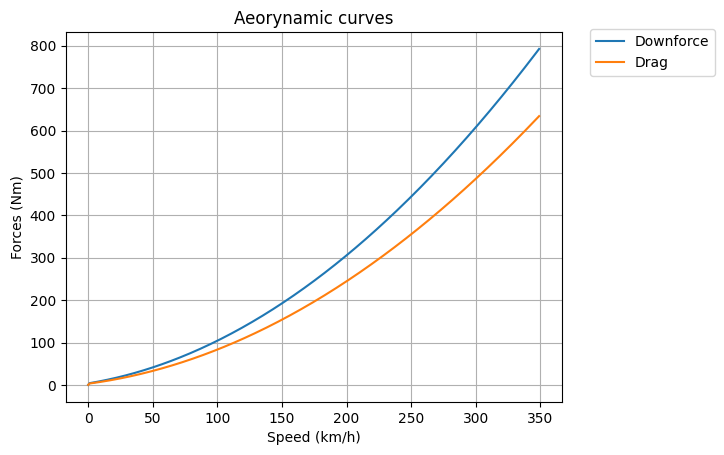

In [13]:
plot_downforce_curve(front_wing)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Aeorynamic curves'}, xlabel='Speed (km/h)', ylabel='Forces (Nm)'>)

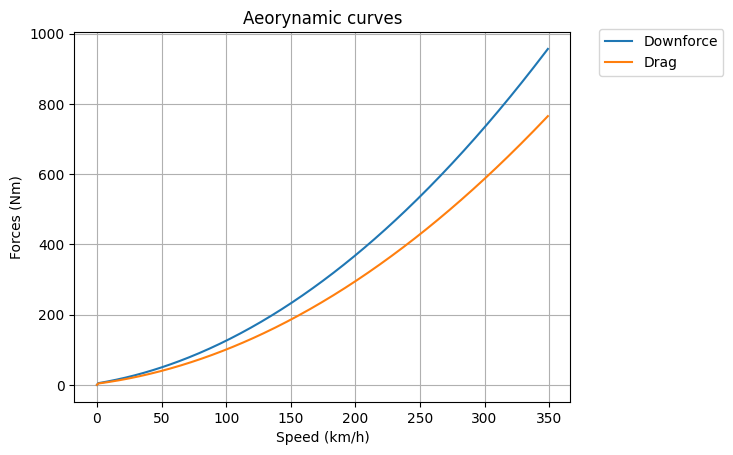

In [14]:
front_wing.flaps.set_angle(30)

plot_downforce_curve(front_wing)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Aeorynamic curves'}, xlabel='Speed (km/h)', ylabel='Forces (Nm)'>)

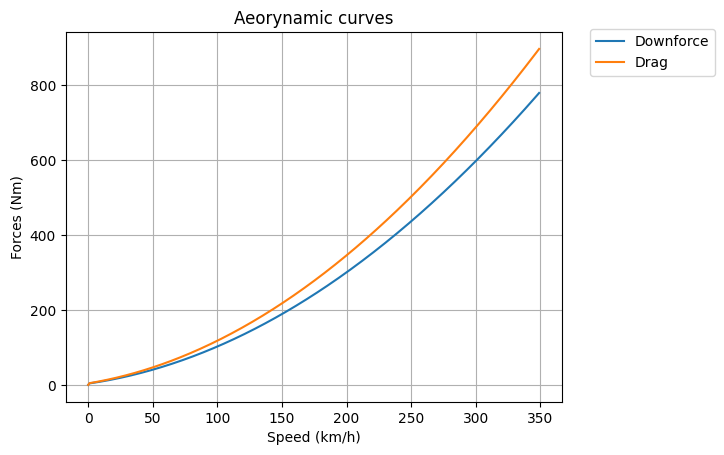

In [17]:
front_wing.flaps.set_angle(60)

plot_downforce_curve(front_wing)